In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [290]:
x,y=make_classification(n_features=2,n_informative=1,n_classes=2,n_clusters_per_class=1,n_samples=100,n_redundant=0,random_state=41,hypercube=False,class_sep=10)

<Axes: >

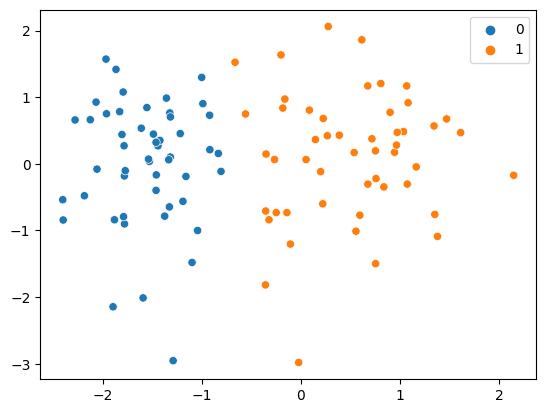

In [291]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [292]:
class custom_Perceptron_trick:
    def __init__(self,epoch=1000,learning_rate=0.1):
        self.epoch=epoch
        self.coef_=None
        self.intercept_=None
        self.learning_rate=learning_rate

    def check(self,x):
        return np.dot(x,self.coef_)+self.intercept_
    
    def fit(self,x,y):
        self.coef_=np.ones(x.shape[1])
        self.intercept_=1
        for i in range(self.epoch):
            temp=np.random.randint(0,x.shape[0])
            self.intercept_+=self.learning_rate*(y[temp]-(0 if self.check(x[temp]) < 0 else 1))
            self.coef_+=self.learning_rate*(y[temp]-(0 if self.check(x[temp]) < 0 else 1))*x[temp]
    def predict(self,x):
         return [1 if self.check(x[i])>0 else 0 for i in range(x.shape[0])] 

In [293]:
trick=custom_Perceptron_trick(learning_rate=0.1)
trick.fit(x,y)


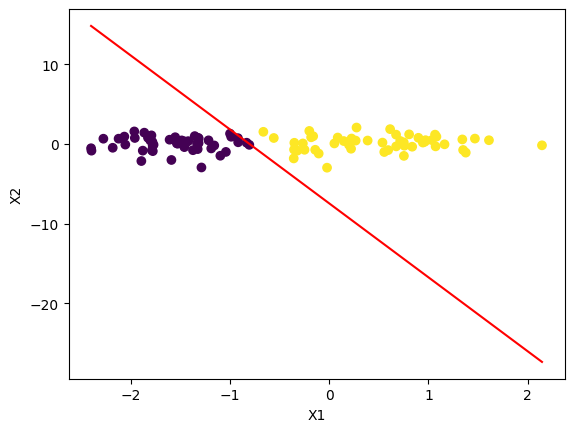

In [294]:
plt.scatter(x[:, 0], x[:, 1], c=y)
x1 = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
x2 = -(trick.coef_[0] / trick.coef_[1]) * x1 - (trick.intercept_ / trick.coef_[1])
plt.plot(x1, x2, color='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()